<a href="https://www.kaggle.com/code/khangluu4903/telco-customer-churn?scriptVersionId=164302882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
telco = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Introduction
This project aims to analyze the churn rate at Telco based upon a variety of variables provided about the customers. For this data set, churn rate is calculated by dividing the number of customers who left within the last month by the total number of customers at the beginning of the month. The resulting percentage represents the proportion of customers who have discontinued their services with Telco. 

This metric is important for businesses, especially subscription-based models like Netflix or Amazon Prime, because it is very much cheaper to retain existing customers than to obtain new customers. As such, knowing how and why customers left can lead to new key insights to improve customer retention efforts, therefore maximizing the dollars spent on retention and marketing to improve profitablity.  

# Data Exploration & Cleaning

In [2]:
telco.shape

(7043, 21)

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# converting SeniorCitizen from strings to integers
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace("yes", 1).infer_objects(copy=False)
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace("no", 0).infer_objects(copy=False)
# converting MonthlyCharges and TotalCharges into double
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors="coerce")
telco["MonthlyCharges"] = pd.to_numeric(telco["MonthlyCharges"], errors="coerce")
# check for errors
telco["MonthlyCharges"].isnull().sum()

0

In [6]:
# check for errors
telco["TotalCharges"].isnull().sum()

11

In [7]:
# drop observations with missing values
telco.dropna(subset=["TotalCharges"], inplace=True)
telco["TotalCharges"].isnull().sum()

0

Text(0.5, 0, 'Churn Rate')

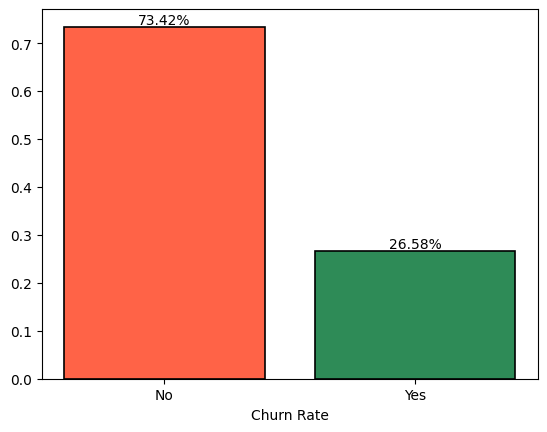

In [8]:
# What is the overall churn rate?
counts = telco["Churn"].value_counts()
proportions = counts / len(telco)
plt.bar(proportions.index, proportions.values,  color=['tomato', 'seagreen'], edgecolor='black', linewidth=1.2)
for i, proportion in enumerate(proportions):
    plt.text(i, proportion, f'{proportion:.2%}', ha='center', va='bottom')
plt.xlabel('Churn Rate')

# Data Analysis

In order to understand more about the churn pattern for Telco consumers, I formulate a few questions that I hope to answer through data analysis. 

* Does the length of tenure impacts churn rate?
* Does the churn rate differs for each Telco service?
* Is the churn rate lower for customers using multiple of Telco's services?

# Does the length of tenure impacts churn rate?

To answer this question, I need to find the churn rate for each month of tenure. Then, I will dive deeper by finding the churn rate by years since the begining of service by seperating tenure into 4 bins:
1. Year 1: 1-12 months
2. Year 2: 13-24 months
3. Year 3: 25-36 months
4. Year 4: 37-48 months
4. More than 4 Years: Over 48 months

In [9]:
df =  telco[["tenure"]].copy()  
df["rate_of_tenure"] = 0.0
for i, tenure_value in enumerate(df["tenure"]):
    # Count the number of churns and non-churns for the current tenure value
    no_count = telco[(telco['tenure'] == tenure_value) & (telco['Churn'] == 'No')].shape[0]
    yes_count = telco[(telco['tenure'] == tenure_value) & (telco['Churn'] == 'Yes')].shape[0]
    # Calculate churn rate and assign it to the corresponding row in the new DataFrame
    df.iloc[i, 1] = round((yes_count / (yes_count + no_count)) * 100,2)
print(df)

      tenure  rate_of_tenure
0          1           61.99
1         34           18.46
2          2           51.68
3         45            9.84
4          2           51.68
...      ...             ...
7038      24           24.47
7039      72            1.66
7040      11           31.31
7041       4           47.16
7042      66           14.61

[7032 rows x 2 columns]


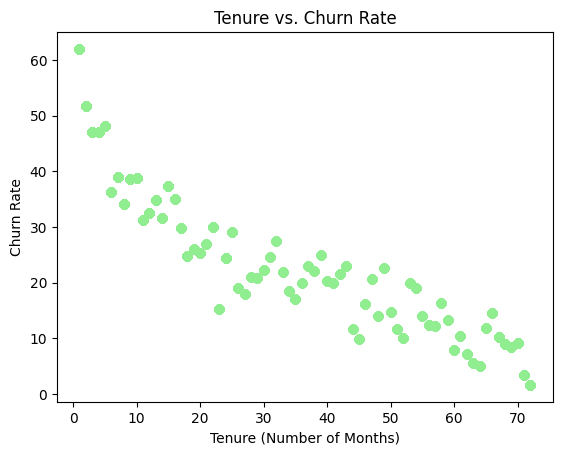

In [10]:
tenure = df["tenure"]
rate = df["rate_of_tenure"]
plt.scatter(tenure,rate, color = "lightgreen")
plt.xlabel("Tenure (Number of Months)")
plt.ylabel("Churn Rate")
plt.title("Tenure vs. Churn Rate")
plt.show()

In [11]:
bins = [0, 12, 24, 36, 48, float('inf')]  # Define the bin edges
labels = ["Year 1", "Year 2", "Year 3", "Year 4", "More than 4 Years"]  # Define the labels for bins
# Create the "tenure_Bins" column using pd.cut()
telco["tenure_Bins"] = pd.cut(telco["tenure"], bins=bins, labels=labels, right=False)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


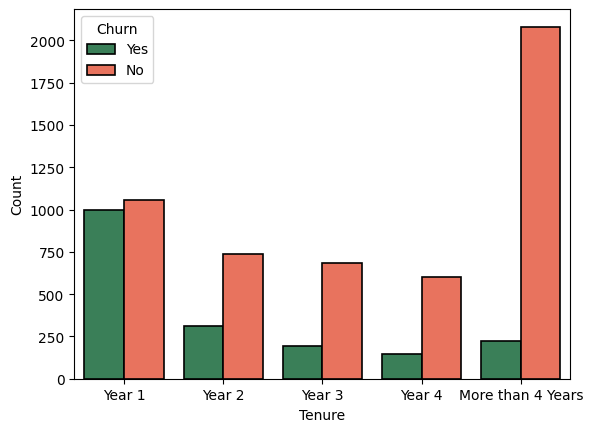

In [12]:
sns.countplot(data=telco, x='tenure_Bins', hue='Churn', palette={'Yes': 'seagreen', 'No': 'tomato'}, 
            hue_order=['Yes', 'No'], dodge=True, edgecolor='black', linewidth=1.2)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_18/493086403.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = telco.groupby('tenure_Bins')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']


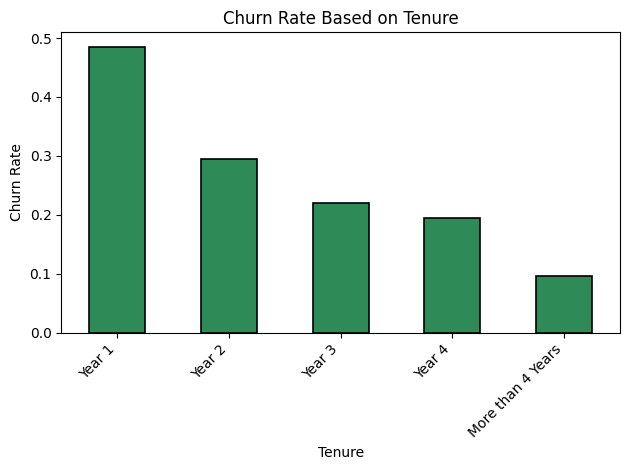

In [13]:
churn_rate = telco.groupby('tenure_Bins')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']
churn_rate.plot(kind='bar', color='seagreen', edgecolor='black', linewidth=1.2)
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Based on Tenure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graphs, I conclude that as the tenure increases, the churn rate decreases significantly. Furthermore, customers are  most likely to end their business with Telco during their first year of service. After than, they are more likely to retain service. With this information, I would recommend Telco to focus customer retention efforts on new customers and those with less than one year of business with Telco. 

Is it possible to predict the churn rate for any customers based upon their tenure? I will build a linear regression model to answer this question.

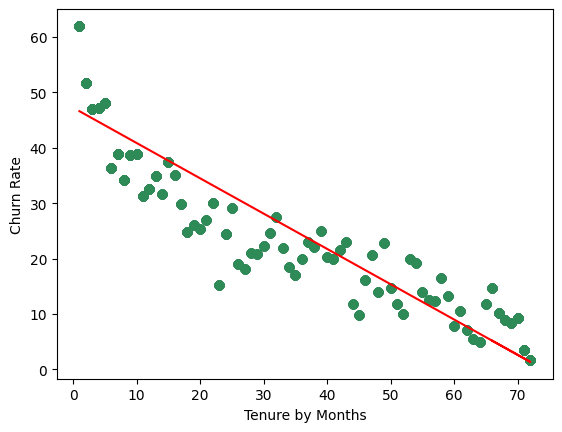

In [14]:
# Apply linear regression
slope, intercept, r, p, err = stats.linregress(tenure,rate)
def funct(x):
    return slope * x + intercept
linearmodel = list(map(funct,tenure))
plt.scatter(tenure, rate, color = "seagreen")
# draw linear line
plt.plot(tenure, linearmodel, color = 'red')
plt.xlabel('Tenure by Months')
plt.ylabel('Churn Rate')
plt.show()

In [15]:
# how good is the linear model?
print(r * r)

0.8313398991912405


In [16]:
# What is the churn rate for a customer with 1 month of tenure?
print(funct(1))
# 6 months?
print(funct(6))
# 5 years?
print(funct(60))

46.601546889340625
43.41538961678559
9.00489107319116


# Does the churn rate differs for each Telco service?

I will example the following services offered by Telco to determine churn rate.
* PhoneService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies

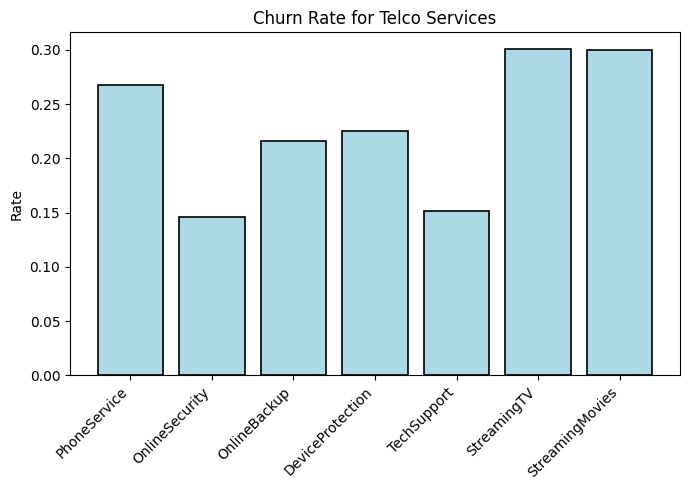

In [17]:
service = telco[["PhoneService", "OnlineSecurity", 
                 "OnlineBackup","DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Churn"]].copy()
churn_rate = {}
for col in service.columns[:-1]: 
    churn_rate[col] = service[service[col] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0)

plt.figure(figsize=(7, 5))
plt.bar(churn_rate.keys(), churn_rate.values(), color = "lightblue", edgecolor='black', linewidth=1.2)
plt.ylabel('Rate')
plt.title('Churn Rate for Telco Services')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

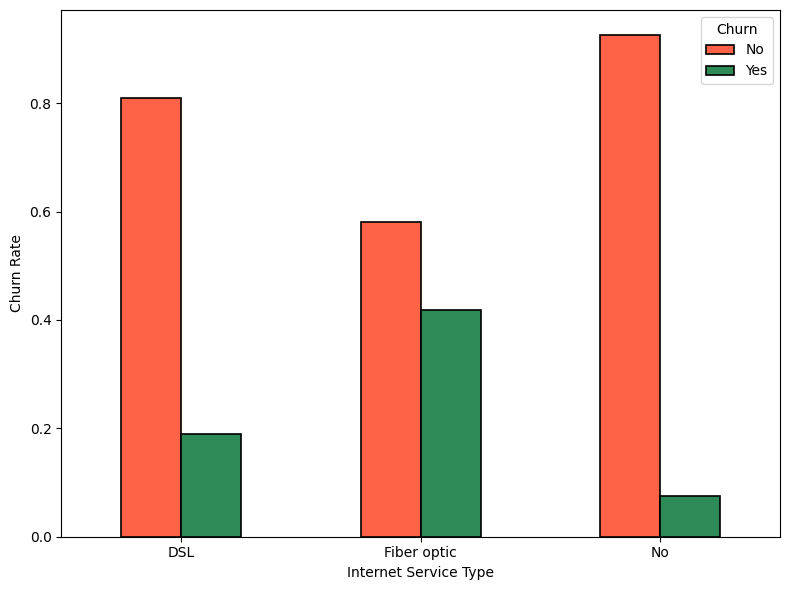

In [18]:
churn_rate = telco.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate.plot(kind='bar', color=['tomato', 'seagreen'], figsize=(8, 6), edgecolor='black', linewidth=1.2)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The result shows that the churn rates for customers who are using Streaming TV, Streaming Movies, and Phone Service are the highest for Telco, probably because of competitions from other carriers and online streaming services like Netflix and Hulu. Meanwhile, Online Security and Tech Support have the lowest churn rates. Additionally, by examining the breakdown of Internet service used by the customers, those that are using Fiber optic has the highest churn rate, doubling the rate for the next high service, DSL.

# Is the churn rate lower for customers using multiple of Telco's services?

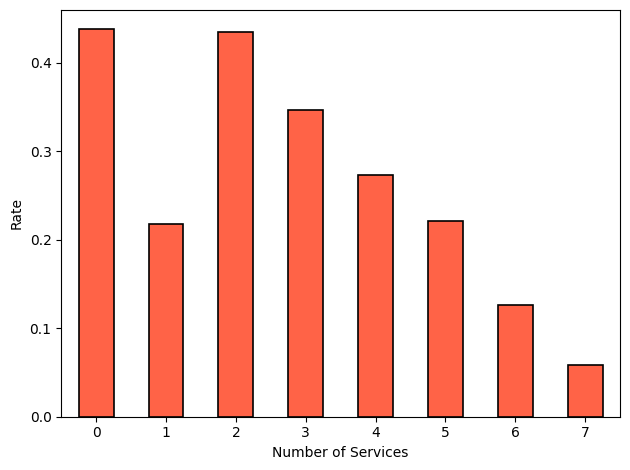

In [19]:
service["total_number_of_services"] = service[["PhoneService", "OnlineSecurity", 
                 "OnlineBackup","DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].eq("Yes").sum(axis=1)
churn_rate = service.groupby("total_number_of_services")["Churn"].value_counts(normalize=True).unstack().fillna(0)["Yes"]

churn_rate.plot(kind="bar", color= "tomato", edgecolor="black", linewidth=1.2)
plt.xlabel("Number of Services")
plt.ylabel("Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The graph shows that customers who are using 2 Telco services have the highest churn rate. It also shows that customers who are using 0 Telco service has a high churn rate, revealing that not all Telco's services are included in the data set, hence making sense of the number 0 from above. Overall, the churn rate decreases as the number of services a customer has increases.

# Conclusion

After analyzing the data set on customer churn by Telco, I offer the following recommendations to enhance customer retention efforts and promote long-term loyalty:

**New Customer Focus:** Prioritize retention efforts on customers with less than one year of tenure, as they exhibit the highest churn rate. Implement personalized onboarding experiences, proactive communication, and targeted support to enhance their initial interactions with Telco.

**High-Churn Service Retention:** Concentrate retention efforts on services with high churn rates, such as Streaming TV, Streaming Movies, Phone Service, and Fiber optic services. Conduct further analyses to identify areas for improvement, then implement targeted enhancements to increase service satisfaction and retention.

**Bundle Promotion Strategy:** Introduce value-added service bundles or packages to incentivize customers to subscribe to multiple offerings. Customize bundle offerings based on customer preferences and usage patterns.